# Library imports, setup

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from data import load_metadata, visualize_data, make_dataset
from model import build_cnn
from score_metrics import get_scores

In [55]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# check tf version
print(tf.__version__)

gpus = tf.config.list_physical_devices('GPU')
for device in gpus:
    tf.config.experimental.set_memory_growth(device, True)
    print(f"Found GPU {device.name}, and set memory growth to True.")


2.20.0


# Loading data

In [56]:
image_metadata, species_metadata = load_metadata()
num_classes = len(species_metadata)

Number of classes: 296


d:\Egyetem_adat\kigyo2\snek\src\Models\data.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_metadata["encoded_id"] = encoder.fit_transform(image_metadata["class_id"])
d:\Egyetem_adat\kigyo2\snek\src\Models\data.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_metadata["image_path"] = image_metadata["image_path"].apply(


# Visualizing data

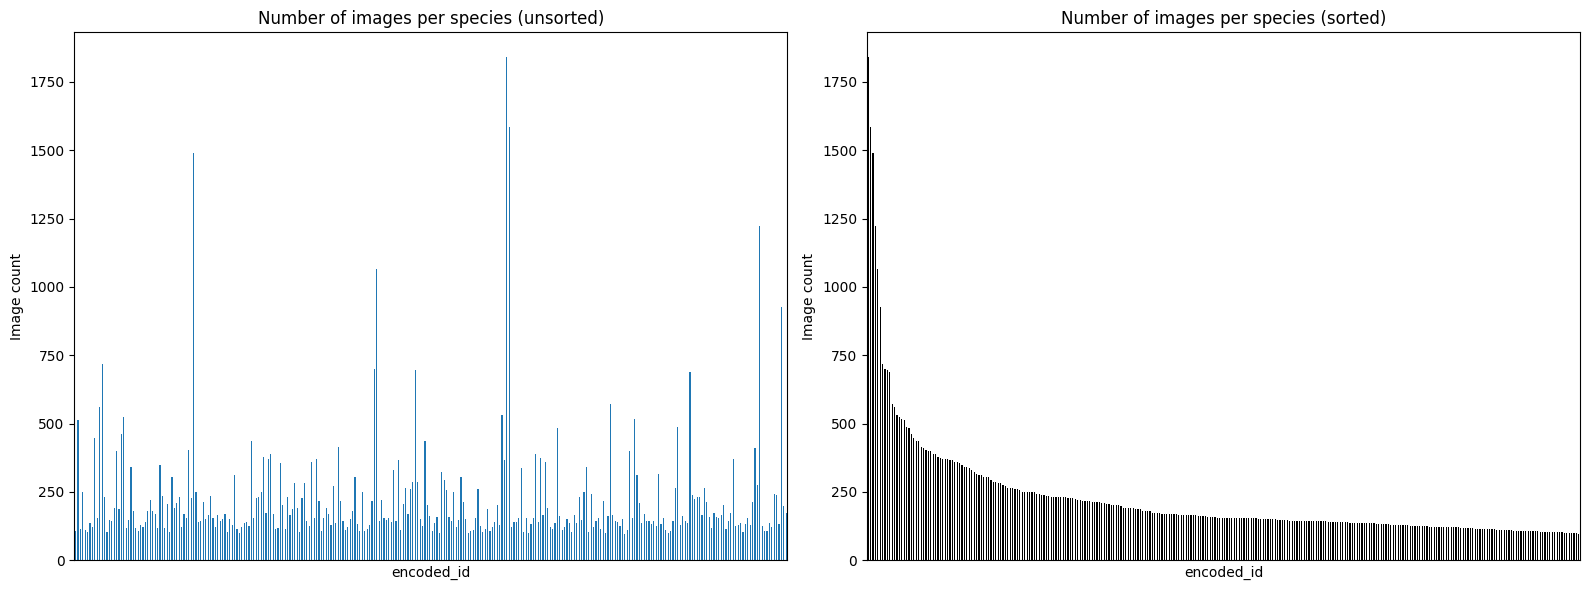

Maximum number per species class is 1839
Minimum number per species class is 96


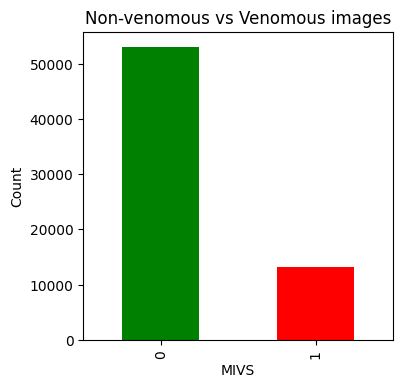

MIVS
0    53164
1    13290
Name: count, dtype: int64


In [57]:
#in data.py
visualize_data(image_metadata)

Loading python images from folder

# Building model

In [58]:
IMAGE_RESOLUTION=28
from data import make_batches, split_dataset

#szükség van külön a train infora is
train_info, val_info, test_info = split_dataset(image_metadata)
train_dataset = make_batches(train_info, IMAGE_RESOLUTION)
val_dataset   = make_batches(val_info, IMAGE_RESOLUTION)
test_dataset  = make_batches(test_info, IMAGE_RESOLUTION)


#train_dataset, val_dataset, test_dataset = make_dataset(image_metadata, IMAGE_RESOLUTION)

In [59]:
model=build_cnn(num_classes, IMAGE_RESOLUTION)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 28, 28, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 28, 28,    │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 14, 14,    │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 14, 14,    │     18,496 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 7, 7, 64)  │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 7, 7, 128) │     73,856 │ max_pooling2d_17… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 3, 3, 128) │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 3, 3, 32)  │     36,896 │ max_pooling2d_18… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 1, 1, 32)  │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ max_pooling2d_19… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      4,224 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ species (Dense)     │ (None, 296)       │     38,184 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ venom (Dense)       │ (None, 1)         │        129 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 172,681 (674.54 KB)

 Trainable params: 172,681 (674.54 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(
    optimizer='adam',
    
    loss={'species': 'sparse_categorical_crossentropy',
          'venom': 'binary_crossentropy'},

    metrics={'species': 'accuracy',
             'venom': 'accuracy'}
    )

In [61]:
from sklearn.utils.class_weight import compute_class_weight

# species class_weight
species_classes = np.unique(train_info["encoded_id"])
species_cw = compute_class_weight(
    class_weight="balanced",
    classes=species_classes,
    y=train_info["encoded_id"]
)
species_cw_dict = {int(c): w for c, w in zip(species_classes, species_cw)}

# venom class_weight 
venom_classes = np.unique(train_info["MIVS"]) 
venom_cw = compute_class_weight(
    class_weight="balanced",
    classes=venom_classes,
    y=train_info["MIVS"]
)
venom_cw_dict = {int(c): w for c, w in zip(venom_classes, venom_cw)}



In [62]:
num_species = len(species_cw_dict)


#tf vector
species_weight_vec = tf.constant(
    [species_cw_dict[i] for i in range(num_species)],
    dtype=tf.float32
)
venom_weight_vec = tf.constant(
    [venom_cw_dict[0], venom_cw_dict[1]],
    dtype=tf.float32
)


def add_sample_weight(image, labels):
    species = labels["species"]        
    venom   = labels["venom"]           

    sw_species = tf.gather(
        species_weight_vec,
        tf.cast(species, tf.int32)
    )
    sw_venom = tf.gather(
        venom_weight_vec,
        tf.cast(venom, tf.int32)
    )


    sample_weight = sw_species * sw_venom


    return image, labels, sample_weight



In [63]:
n_epochs = 10
train_dataset = train_dataset.map(add_sample_weight)

# checkpointing based on the validation loss
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

#reduce loss rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6
)


# model training
model_history = model.fit(
                            x= train_dataset,
                            epochs= n_epochs,
                            validation_data= val_dataset,
                            callbacks=[model_checkpoint_callback,early_stop, reduce_lr],
                            )

model.load_weights('model.keras')  # load weights back

Epoch 1/10
1661/1662 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.5292 - species_accuracy: 0.0045 - species_loss: 5.8030 - venom_accuracy: 0.3442 - venom_loss: 0.7262
Epoch 1: val_loss improved from None to 6.52717, saving model to model.keras
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - loss: 6.4611 - species_accuracy: 0.0037 - species_loss: 5.7372 - venom_accuracy: 0.3224 - venom_loss: 0.7236 - val_loss: 6.5272 - val_species_accuracy: 0.0069 - val_species_loss: 5.8242 - val_venom_accuracy: 0.4224 - val_venom_loss: 0.7029 - learning_rate: 0.0010
Epoch 2/10
1659/1662 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3636 - species_accuracy: 0.0042 - species_loss: 5.6415 - venom_accuracy: 0.3115 - venom_loss: 0.7221
Epoch 2: val_loss improved from 6.52717 to 6.50209, saving model to model.keras
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 72s 24ms/step - loss: 6.3199 - species_accuracy: 0.0048 - species_loss: 5.6003 - venom_accuracy: 0.3321 - venom_loss: 0.7193 - val_loss: 6.5021 - val_species_accuracy: 0

In [64]:
test_history = model.evaluate(test_dataset)
print("Test Loss: ", test_history[0])
print("Test Accuracy: ", test_history[1])

208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 6.2560 - species_accuracy: 0.0125 - species_loss: 5.5893 - venom_accuracy: 0.6138 - venom_loss: 0.6661
Test Loss:  6.256011962890625
Test Accuracy:  5.589348793029785


# Example results

In [65]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def example_results_from_dataset(model, ds, species_names, n_examples=5, venom_threshold=0.5):
    """
    ds must yield: (image, {'species': int, 'venom': int})
    species_names: list where index == encoded_id
    """
    ds = ds.unbatch().shuffle(1000)
    # unbatch to individual samples and take a few
    samples = list(ds.take(n_examples))
    #samples = list(ds.unbatch().take(n_examples))
    imgs = [x[0] for x in samples]
    lbls = [x[1] for x in samples]

    # stack to a batch for one predict()
    x_batch = tf.stack(imgs, axis=0)
    pred_species_logits, pred_venom_prob = model.predict(x_batch, verbose=0)

    plt.figure(figsize=(3.3 * len(imgs), 3.3))
    for i, (img, y) in enumerate(zip(imgs, lbls), start=1):
        true_species = int(y["species"].numpy())
        true_venom   = int(y["venom"].numpy())

        pred_species = int(np.argmax(pred_species_logits[i-1]))
        pred_venom   = bool(float(pred_venom_prob[i-1][0]) > venom_threshold)

        true_name = species_names[true_species] if 0 <= true_species < len(species_names) else str(true_species)
        pred_name = species_names[pred_species] if 0 <= pred_species < len(species_names) else str(pred_species)

        plt.subplot(1, len(imgs), i)
        plt.imshow(img.numpy())
        plt.axis("off")
        plt.title(
            f"True: {true_name} ({'Venom' if true_venom else 'Safe'})\n"
            f"Pred: {pred_name} ({'Venom' if pred_venom else 'Safe'})",
            fontsize=9
        )
    plt.tight_layout(); plt.show()





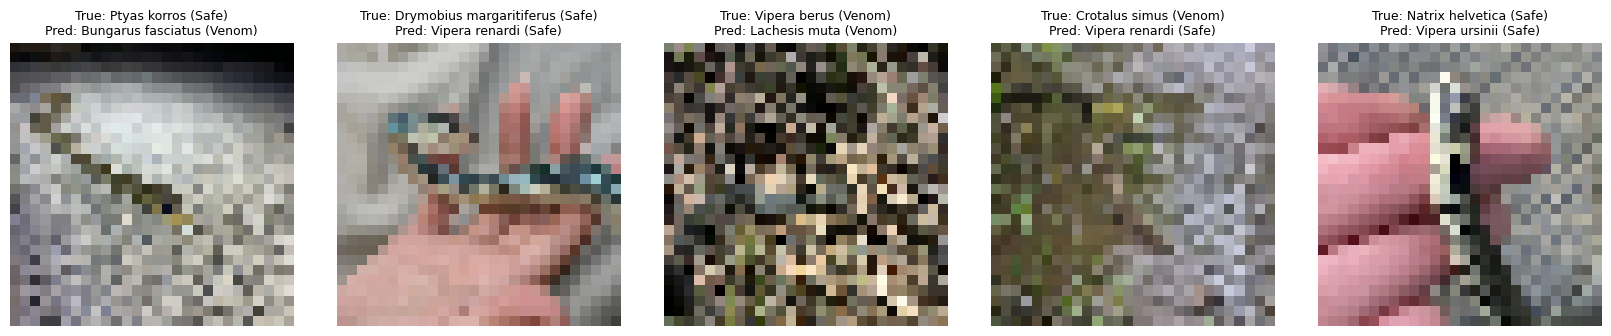

In [72]:
example_results_from_dataset(model, test_dataset, species_metadata, n_examples=5)


# Calculating scoring metrics

Function to tell if the species is venomous or not, based on encoded_id

In [67]:
get_scores(model, image_metadata, test_dataset, venom_threshold=0.5)

208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
=== Evaluation Metrics ===
1) Species accuracy: 0.0125
2) Macro-averaged F1 (species): 0.0036
3) Venom decision accuracy: 0.6138
4) Venom-weighted species accuracy: 0.2479


{'species_accuracy': 0.01248871501655131,
 'macro_f1': 0.00356825469298362,
 'venom_accuracy': 0.6137526331628047,
 'venom_weighted_species_accuracy': np.float64(0.24785681186283592),
 'y_species_true': array([ 61, 185, 201, ..., 150,  74, 154], shape=(6646,), dtype=int32),
 'y_species_pred': array([242, 162, 253, ..., 285,  23,  46], shape=(6646,)),
 'y_venom_true': array([1, 0, 0, ..., 0, 1, 0], shape=(6646,), dtype=int32),
 'y_venom_pred': array([0, 1, 1, ..., 0, 0, 0], shape=(6646,))}